In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.utils.vis_utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

In [2]:
train_dataset= ImageDataGenerator(
    zoom_range=0.5,
    shear_range=0.3, 
    horizontal_flip=True, 
    preprocessing_function=preprocess_input )

valid_dataset= ImageDataGenerator(preprocessing_function=preprocess_input )

In [3]:
train =train_dataset.flow_from_directory(directory= "C:/Users/Asus/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", 
                                         target_size=(256,256), 
                                         batch_size=32)

valid =valid_dataset.flow_from_directory(directory= "C:/Users/Asus/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", 
                                         target_size=(256,256),
                                         batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [4]:
t_image, label= train.next()

In [5]:
def plotImage(img_arr, label):
    for im , l in zip(img_arr, label):
      plt.figure(figsize=(5,5))
      plt.imshow(im)
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


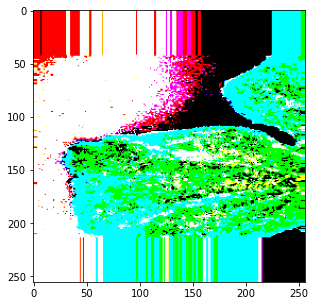

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


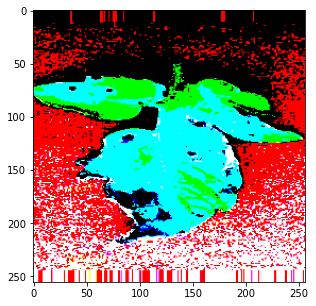

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


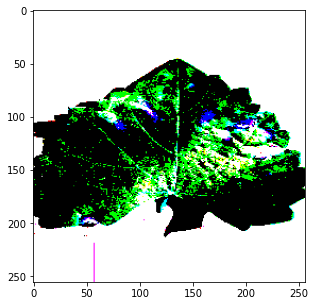

In [6]:
plotImage(t_image[:3], label[:3])

In [7]:


resnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
resnet50.trainable = False

x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(38, activation="softmax")(x)



In [8]:


model = Model(resnet50.input, x)



In [9]:


from tensorflow.keras.optimizers import Adam




In [10]:


model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])




C:\Users\Asus\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
from keras.models import load_model
model=load_model("C:/Users/Asus/resnet50.h5")

In [12]:


checkpoint = ModelCheckpoint("resnet50.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')



In [13]:
res_his=model.fit_generator(
    train,
    epochs=5,
    steps_per_epoch=50,
    validation_data=valid,
    validation_steps=25,
    callbacks = [checkpoint, early]
)

<ipython-input-13-4370a35a85d6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  res_his=model.fit_generator(


Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9631
Epoch 1: val_accuracy improved from -inf to 0.96625, saving model to resnet50.h5
50/50 [==============================] - 225s 4s/step - loss: 0.1307 - accuracy: 0.9631 - val_loss: 0.1163 - val_accuracy: 0.9663
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.1395 - accuracy: 0.9594
Epoch 2: val_accuracy did not improve from 0.96625
50/50 [==============================] - 220s 4s/step - loss: 0.1395 - accuracy: 0.9594 - val_loss: 0.1310 - val_accuracy: 0.9613
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.1414 - accuracy: 0.9550
Epoch 3: val_accuracy did not improve from 0.96625
50/50 [==============================] - 230s 5s/step - loss: 0.1414 - accuracy: 0.9550 - val_loss: 0.1222 - val_accuracy: 0.9625
Epoch 4/5
50/50 [==============================] - ETA: 0s - loss: 0.1280 - accuracy: 0.9638
Epoch 4: val_accuracy improved from 0.96625 to 0.97375,

In [14]:
h= res_his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

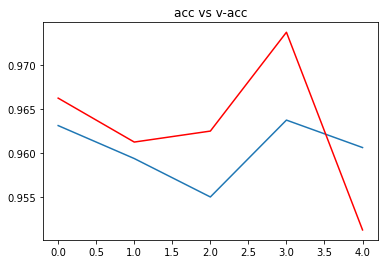

In [15]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("acc vs v-acc")
plt.show()

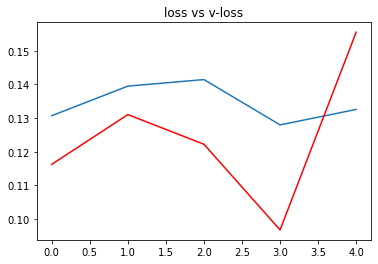

In [16]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [17]:
#from keras.models import load_model
model=load_model("C:/Users/Asus/resnet50.h5")

In [18]:
acc= model.evaluate(valid)[1]
print(f"The accuracy of the model is = {acc*100} %")

550/550 [==============================] - 965s 2s/step - loss: 0.1064 - accuracy: 0.9663
The accuracy of the model is = 96.62531018257141 %


In [20]:
import tensorflow as tf

TFlite_Model = tf.keras.models.load_model('resnet50.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("TFlite_Model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmps6scopsl\assets


102511992